In [2]:
import ipywidgets as wg
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# Here we calculate the regression line using the fórmula

df = pd.read_csv('Google.csv', usecols=['Date','Close'], parse_dates=['Date'])
size = df.Date.size


def lin_plot(s=0, f=size):
    
    start_row = s
    end_row = f

    dates = df['Date'][start_row:end_row].values.astype(np.int64) // 10 ** 9
    prices =  df['Close'][start_row:end_row]

    # Regression line: y = mx+ c
    #The slope (m) formula is given by:
    #        m= SUM((x-xm)(y-ym))/SUM((x-xm)^2)
    slope = (((dates - dates.mean())*(prices-prices.mean())).sum())/(((dates-dates.mean())**2).sum())

    #constant c = y-mx
    c = prices.mean() - (dates.mean())*slope

    #predicted values for the x data
    y_pred = dates*slope + c    
    
#   The r² error calculated by SUM((y_pred - y_mean)²)/SUM((y - y_mean)²)
#   More closer to the predicted line, more closer to one...
    error = (((y_pred - prices.mean())**2).sum())/(((prices - prices.mean())**2).sum())
    display('error^2 = ', error)
    
    plt.scatter(dates, prices)
    plt.plot(dates, y_pred, 'red')
    
    
wg.interact(lin_plot, s=(0,size), f=(0,size))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0wLCBkZXNjcmlwdGlvbj11J3MnLCBtYXg9MzEyNSksIEludFNsaWRlcih2YWx1ZT0zMTI1LCBkZXNjcmlwdGlvbj11J2YnLCDigKY=


<function __main__.lin_plot>

In [28]:
# Here we calculate the regression line using the sklearn module
from sklearn.linear_model import LinearRegression

def lin_plot_mod(s=0, f=size):
    
    start_row = s
    end_row = f

    dates = df['Date'][start_row:end_row].values.astype(np.int64) // 10 ** 9
    dates = dates.reshape(-1,1)
    prices =  df['Close'][start_row:end_row]

    
    regressor = LinearRegression().fit(dates, prices)
    y_pred = regressor.predict(dates)
    display(regressor.score(dates,prices))

    
    plt.scatter(dates, prices)
    plt.plot(dates, y_pred, 'red')
    
    
wg.interact(lin_plot_mod, s=(0,size), f=(0,size))


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0wLCBkZXNjcmlwdGlvbj11J3MnLCBtYXg9MzEyNSksIEludFNsaWRlcih2YWx1ZT0zMTI1LCBkZXNjcmlwdGlvbj11J2YnLCDigKY=


<function __main__.lin_plot_mod>

In [15]:
# OK. Since we have understood the regression formula, lets manipulate the dataset
# First, lets check the shape of the dataset
df.shape

(3125, 2)

In [210]:
# Now we will create a function to return a slice of the dataset, 
# where the last element is the one to be predicted
def slice_df(start, end):
    return ((df['Date'][start:end].values.astype(np.int64) // 10 ** 9).reshape(-1,1), 
            df['Close'][start:end], 
            (df['Date'][end:end+1].values.astype(np.int64) // 10 ** 9).reshape(-1,1),
            df['Close'][end:end+1])

In [331]:
# lets slice the dataset and get the elements
dates, prices, x_, y_ = slice_df(1,10)

In [332]:
# Train the model
regressor = LinearRegression().fit(dates, prices)
y_pred = regressor.predict(x_)

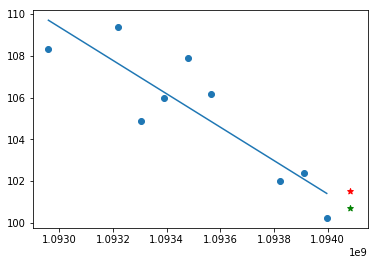

In [333]:
# plot the actual (orange *) and the predicted values (green *)
plt.scatter(dates, prices)
plt.scatter(x_, y_, color='red', marker='*')
plt.plot(dates, regressor.predict(dates))
plt.scatter(x_, y_pred, color='green', marker='*')

In [335]:
# calculate the residuals (closer to 1 the better)
# and the price prediction percentage error (closer to 0 the better):
perc = ((y_pred - y_)/y_)*100
print('R^2 error: ' + str(regressor.score(dates, prices)))
print('Price percentage error: ' + str(perc.values[0]) + '%')

R^2 error: 0.764043134973254
Price percentage error: -0.7784739170919648%
